In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import pathlib
import seaborn as sns

In [3]:
local_zip = '/content/drive/MyDrive/Tugas_Akhir/Dataset/dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./dataset')
zip_ref.close()

In [4]:
base_dir = './dataset/TB_Chest_Radiography_Database'

tbc = os.path.join(base_dir, 'Tuberculosis')
normal = os.path.join(base_dir, 'Normal')

print(len(os.listdir(tbc)))
print(len(os.listdir(normal)))

700
700


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      validation_split=0.2)

train_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(224, 224),
                                                    subset='training')     

validation_generator = train_datagen.flow_from_directory(base_dir,
                                                         batch_size=32,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224),
                                                         subset='validation')

Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Normal': 0, 'Tuberculosis': 1}

# **Training first Model with my own architectur**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

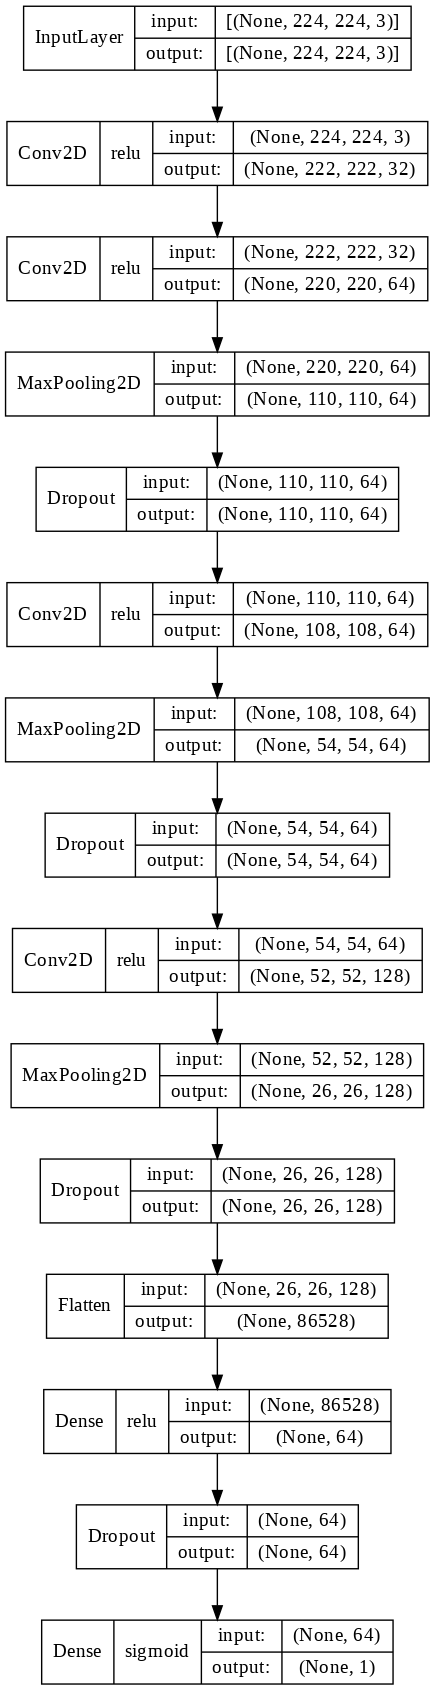

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print('Good enough accuracy so cancelling training!')
      self.model.stop_training = True

callback = MyCallback()

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 2,
    verbose = 2,
    callbacks=[callback]
)

<ipython-input-14-981c21934917>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
8/8 - 7s - loss: 0.2853 - accuracy: 0.8984 - val_loss: 0.4218 - val_accuracy: 0.8750 - 7s/epoch - 837ms/step
Epoch 2/25
8/8 - 7s - loss: 0.2544 - accuracy: 0.8750 - val_loss: 0.3631 - val_accuracy: 0.9531 - 7s/epoch - 846ms/step
Epoch 3/25
8/8 - 7s - loss: 0.3260 - accuracy: 0.8633 - val_loss: 0.3901 - val_accuracy: 0.9062 - 7s/epoch - 830ms/step
Epoch 4/25
8/8 - 7s - loss: 0.2394 - accuracy: 0.9062 - val_loss: 0.3919 - val_accuracy: 0.8438 - 7s/epoch - 842ms/step
Epoch 5/25
8/8 - 7s - loss: 0.2834 - accuracy: 0.8711 - val_loss: 0.4053 - val_accuracy: 0.8594 - 7s/epoch - 852ms/step
Epoch 6/25
8/8 - 7s - loss: 0.2544 - accuracy: 0.8867 - val_loss: 0.3775 - val_accuracy: 0.8750 - 7s/epoch - 843ms/step
Epoch 7/25
8/8 - 7s - loss: 0.2822 - accuracy: 0.8594 - val_loss: 0.2883 - val_accuracy: 0.9375 - 7s/epoch - 850ms/step
Epoch 8/25
8/8 - 7s - loss: 0.2820 - accuracy: 0.8672 - val_loss: 0.3187 - val_accuracy: 0.8594 - 7s/epoch - 831ms/step
Epoch 9/25
8/8 - 7s - loss: 0.4017 - acc

Text(0.5, 1.0, 'Training and validation loss')

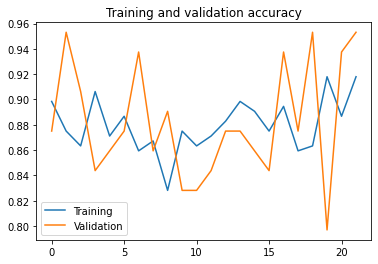

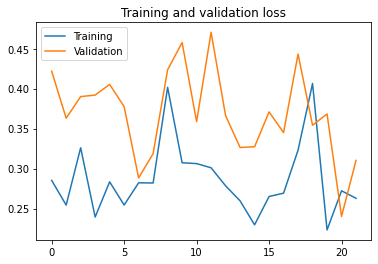

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# **Training second Model with Alexnet architectur**

In [10]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, 11, strides=4, activation='relu', padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(3, strides=2),
    tf.keras.layers.Conv2D(256, 5, strides=4, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(3, strides=2),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         614656    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 256)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 384)        

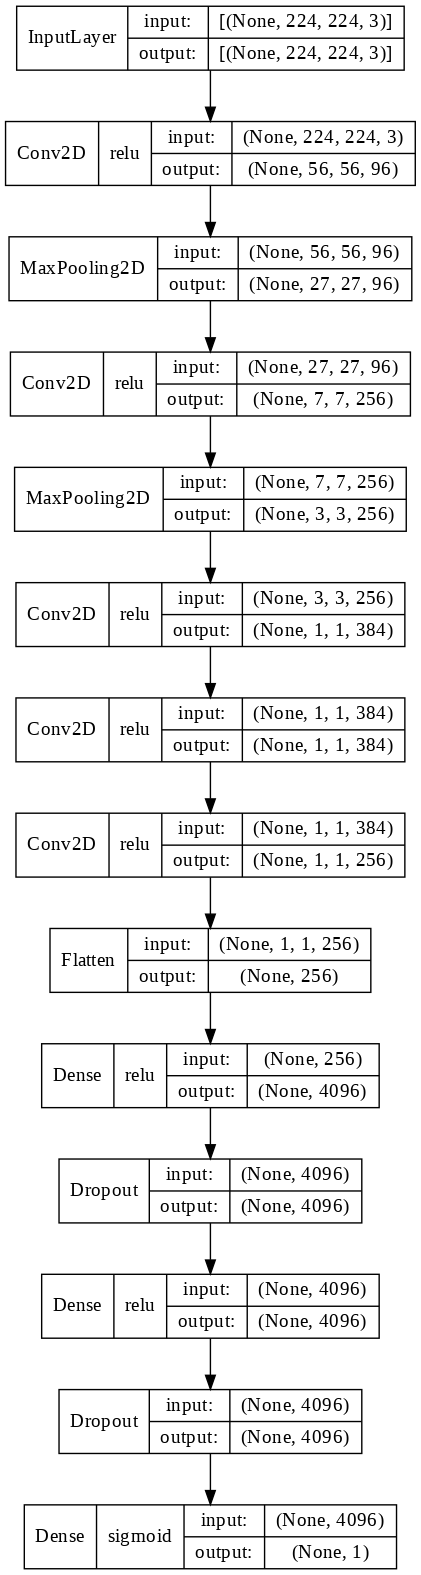

In [11]:
tf.keras.utils.plot_model(
    model2,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    show_layer_activations=True,
    dpi=100
)

In [12]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch = 35,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 8,
    verbose = 2,
    callbacks=[callback]
)

<ipython-input-13-22ec80b7228d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(


Epoch 1/25
35/35 - 33s - loss: 0.6973 - accuracy: 0.5250 - val_loss: 0.6914 - val_accuracy: 0.5039 - 33s/epoch - 947ms/step
Epoch 2/25
35/35 - 23s - loss: 0.6834 - accuracy: 0.5527 - val_loss: 0.6666 - val_accuracy: 0.5703 - 23s/epoch - 666ms/step
Epoch 3/25
35/35 - 23s - loss: 0.5865 - accuracy: 0.7330 - val_loss: 0.3323 - val_accuracy: 0.9102 - 23s/epoch - 645ms/step
Epoch 4/25
35/35 - 23s - loss: 0.4100 - accuracy: 0.8062 - val_loss: 0.4674 - val_accuracy: 0.7266 - 23s/epoch - 648ms/step
Epoch 5/25
35/35 - 23s - loss: 0.3057 - accuracy: 0.8661 - val_loss: 0.5017 - val_accuracy: 0.6719 - 23s/epoch - 649ms/step
Epoch 6/25
35/35 - 23s - loss: 0.2640 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.8320 - 23s/epoch - 650ms/step
Epoch 7/25
35/35 - 24s - loss: 0.2059 - accuracy: 0.9259 - val_loss: 0.3197 - val_accuracy: 0.8672 - 24s/epoch - 680ms/step
Epoch 8/25
Good enough accuracy so cancelling training!
35/35 - 23s - loss: 0.2051 - accuracy: 0.9116 - val_loss: 0.2393 - val_accur

Text(0.5, 1.0, 'Training and validation loss')

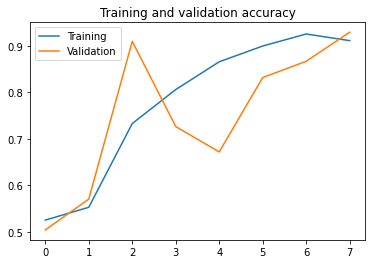

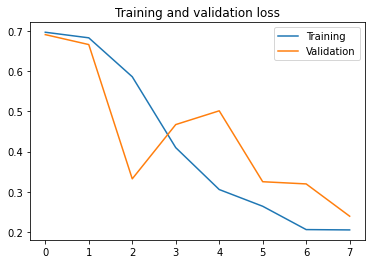

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
acc      = history2.history[     'accuracy' ]
val_acc  = history2.history[ 'val_accuracy' ]
loss     = history2.history[    'loss' ]
val_loss = history2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# **Testing of the Models have been made**

In [15]:
local_zip = '/content/drive/MyDrive/Tugas_Akhir/Dataset/uji.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./uji')
zip_ref.close()

In [16]:
uji_dir = './uji'

uji_datagen = ImageDataGenerator(
      rescale = 1.0/255.)

uji_generator = uji_datagen.flow_from_directory(uji_dir,
                                                batch_size=32,
                                                class_mode='binary',
                                                target_size=(224, 224))

Found 100 images belonging to 2 classes.


In [17]:
uji_generator.class_indices

{'normal': 0, 'tuberkulosis': 1}

In [18]:
# predict = model.predict_generator(uji_generator) #predict using first model
predict = model2.predict_generator(uji_generator) #predict using second model
x = sorted(predict[:50])
y = sorted(predict[51:])
print(10 * '=' + 'Normal' + '=' * 10)
for i in x:
  print(i)
print('\n')
print(10 * '=' + 'Tuberkulosis' + '=' * 10)
for j in y:
  print(j)

<ipython-input-18-a5bcc31d448d>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model2.predict_generator(uji_generator) #predict using second model


==========Normal==========
[0.26835608]
[0.3170911]
[0.39192596]
[0.39893287]
[0.4028027]
[0.44586208]
[0.46853408]
[0.48754928]
[0.5159017]
[0.5176522]
[0.54282737]
[0.5487939]
[0.57137275]
[0.58871424]
[0.5944008]
[0.6106137]
[0.6209773]
[0.6283366]
[0.63414556]
[0.64495283]
[0.6466057]
[0.6924741]
[0.70044327]
[0.70534337]
[0.7277537]
[0.7343225]
[0.74255925]
[0.7448298]
[0.7538673]
[0.7544274]
[0.75540364]
[0.7612123]
[0.76983213]
[0.79468673]
[0.8003441]
[0.810316]
[0.83993423]
[0.8414018]
[0.85995877]
[0.8634197]
[0.86468315]
[0.8919986]
[0.89816827]
[0.91464907]
[0.9165658]
[0.9211354]
[0.92659694]
[0.9281173]
[0.93123454]
[0.9426651]


==========Tuberkulosis==========
[0.34966013]
[0.41002244]
[0.4316728]
[0.4581727]
[0.46214265]
[0.4648348]
[0.47731712]
[0.50850725]
[0.5316722]
[0.5356284]
[0.55081606]
[0.56596786]
[0.5799162]
[0.60622436]
[0.61837804]
[0.63055414]
[0.63871413]
[0.64536375]
[0.6645014]
[0.70010644]
[0.70647407]
[0.71013707]
[0.7151612]
[0.74545604]
[0.7529305]

In [19]:
data_asli = []
prediksi = []
labels = uji_generator.class_indices
label_names = uji_generator.class_indices.keys()

for i in uji_generator.classes:
  data_asli.append(i)

# predict = model.predict_generator(uji_generator) #predict using first model
predict = model2.predict_generator(uji_generator) #predict using second model
for j in predict:
  if j>=0.75:
    prediction = 'tuberkulosis'
  else:
    prediction = 'normal'
  classes = labels[prediction]
  prediksi.append(classes)

<ipython-input-19-ae6121cc1762>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model2.predict_generator(uji_generator) #predict using second model


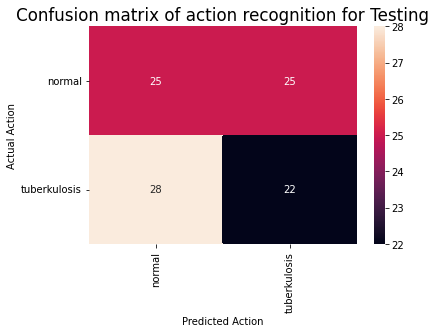

In [20]:
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

plot_confusion_matrix(data_asli, prediksi, label_names, 'Testing')

# **Saliency Maps**
a technique to rank the pixels in an image based on their contribution to the final score from a Convolution Neural Network.


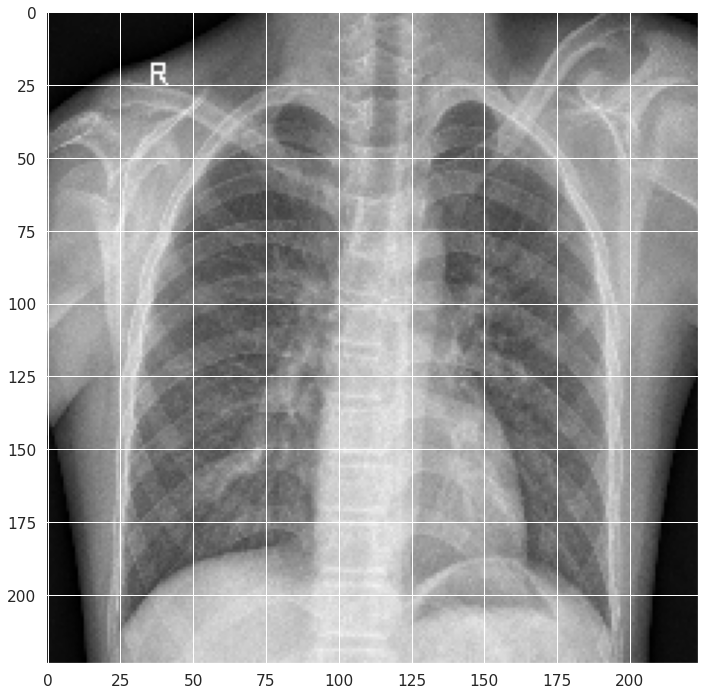

In [21]:
import tensorflow.keras as keras

_img = keras.preprocessing.image.load_img('drive/MyDrive/Tugas_Akhir/Normal.jpeg',target_size=(224,224))
plt.imshow(_img)
plt.show()

In [23]:
img = keras.preprocessing.image.img_to_array(_img)
img = img.reshape((1, *img.shape))
# y_pred = model.predict(img) #model 1
y_pred = model2.predict(img) #model 2

1/1 [==============================] - 0s 135ms/step


In [26]:
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    # pred = model(images, training=False) #model 1
    pred = model2(images, training=False) #model 2
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)

In [27]:
dgrad_abs = tf.math.abs(grads)

In [28]:
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

In [29]:
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

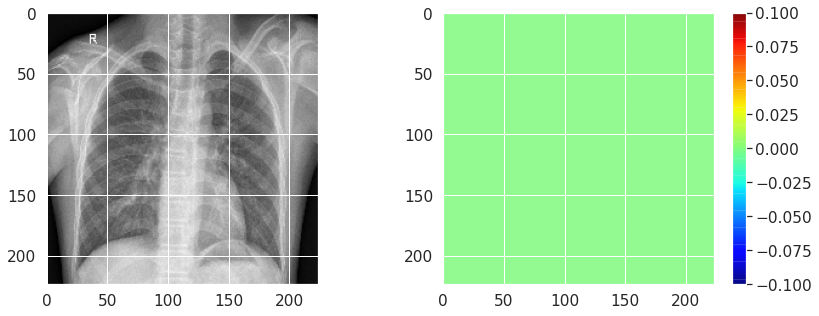

In [30]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

# **Save the the Models**

In [ ]:
model.save("/content/drive/MyDrive/Tugas_Akhir/Model_H5/model.h5")